In [3]:
#Mosaicing
import os
import rasterio as rio
from rasterio.merge import merge

# Paths to the images
images_1 = [r"G:\Manjar\github\rasterData\LC08_L2SP_146040_20241018_20241028_02_T1_SR_B1.TIF"]
images_2 = [r"G:\Manjar\github\rasterData\LC08_L2SP_147040_20241025_20241029_02_T1_SR_B1.TIF"]

# Combine both lists into a single list
image_paths = images_1 + images_2

# Open each raster file and collect the sources
src_files = [rio.open(img) for img in image_paths]

# Perform the mosaic
mosaic, out_transform = merge(src_files)

# Copy the metadata from one of the source files
metadata = src_files[0].meta.copy()
metadata.update({
    "driver": "GTiff",
    "transform": out_transform,
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "count": mosaic.shape[0],  # Number of bands
})

# Create the output directory if it doesn't exist
output_dir = r"G:\Manjar\github\rasterData"
os.makedirs(output_dir, exist_ok=True)
merged_file = os.path.join(output_dir, "merge.tif")

# Write the mosaic to the output file
with rio.open(merged_file, "w", **metadata) as dst:
    dst.write(mosaic)

# Close the open raster files
for src in src_files:
    src.close()

print(f"Merged file created at: {merged_file}")

Merged file created at: G:\Manjar\github\rasterData\merge.tif


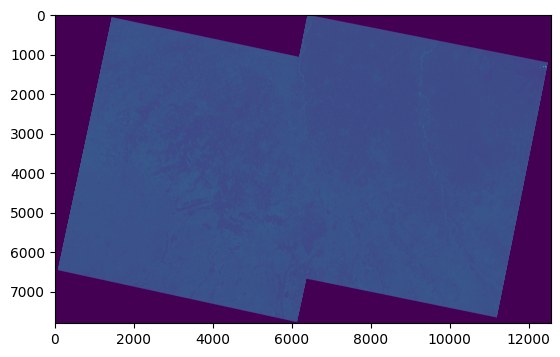

<Axes: >

In [10]:
from rasterio.plot import show

with rio.open(merged_file) as src:
    band = src.read(1)

show(band)